# Carlos Oliveri 5234661
# Vanessa Troche 4260781


Importamos librerias

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import keyboard as kb
import math

Definimos la Clase Vertice

In [9]:
class Vertice:
  def __init__(self,clave):
    self.clave = clave #dato almacenado
    self.vecinos = [] #Lista de vecinos a los que esta conectado
    self.padre = None #Padre asignado en el arbol 
    self.dist = None #distancia al nodo raiz

Definimos la clase Arista

In [10]:
class Arista:
  def __init__(self,V1,V2,D,AB,R,PP):
    self.arista = (V1,V2)
    self.metricas = (D,AB,R,PP)

Definimos la Clase Grafo

In [11]:
class Grafo_D:
  def __init__(self):
    self.vertices = []
    self.aristas = []
    
  def agregarVertice(self,V1):
    self.vertices.append(V1)

  def agregarArista(self,A):
    self.aristas.append(A)
    A.arista[0].vecinos.append(A.arista[1])
    A.arista[1].vecinos.append(A.arista[0])

  def mostrarVecinos(self):
    for u in self.vertices:
      print("Vertice ",u.clave,": ",end="")
      for v in u.vecinos:
        print(v.clave,end="",sep='')
      print("")
  
  def buscarVertice(self,clave):
    for u in self.vertices:
      if u.clave == clave:
        return u
    #print("[Debug] no se encontro el vertice")
    return False
  
  def buscarArista(self,V1,V2):
    for arista in self.aristas:
      if arista.arista == (V1,V2) or arista.arista == (V2,V1):
        return arista
    #print("[Debug] Arista no encontrada")
    return False
  
  def initialize_single_source(self,s):
    for u in self.vertices:
      u.dist = 999999999
      u.padre = None
    s.dist = 0
    
  def relax(self,u,v,p): # Recibe el padre, vecino,peso
    if(v.dist >= u.dist + p):
      v.dist = u.dist + p
      v.padre = u
      
  def bellman_ford(self,s):
    self.initialize_single_source(s)
    for u in self.vertices:
      for v in u.vecinos:
        arista = self.buscarArista(u,v)
        p = arista.metricas[0]
        self.relax(u,v,p)
    for u in self.vertices:
      for v in u.vecinos:
        arista = self.buscarArista(u,v)
        p = arista.metricas[0]
        if(v.dist > u.dist + p):
          return False
    return True
  
  def buscarMenorDist(self,a,b):
    s = self.buscarVertice(a)
    self.bellman_ford(s)
    u = self.buscarVertice(b)
    bandera = False
    vertices = []
    path = []
    vertices.append(u)
    path.append(u.clave)
    D = u.dist
    AB = 99999999
    R = 0
    PP = 0
    while not bandera:
      padre = vertices[-1].padre
      arista = self.buscarArista(padre,vertices[-1])
      if AB > arista.metricas[1]:
        AB = arista.metricas[1]
      R += arista.metricas[2]
      PP += arista.metricas[3]
      vertices.append(padre)
      path.append(padre.clave)
      if(padre == s):
        bandera = True
        PP = abs(1-math.e**PP)
    return (path,D,AB,R,PP)
      
  def mostrarGrafo(self):
        G = nx.DiGraph()
        for u in self.vertices:
            G.add_node(u.clave) #para mostrar vértices sin aristas incidentes o de salida
        for u in self.vertices:
            for v in u.vecinos:
                arista = self.buscarArista(u,v)
                p = arista.metricas[0]
                G.add_edge(u.clave,v.clave,weight=p)
        pos = nx.circular_layout(G)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx(G,pos,node_size=700)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        for a in pos:
            u = self.buscarVertice(a)
            x,y=pos[a]
            plt.text(x,y+0.2,s=str(u.dist), bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
        plt.axis('off')
        plt.show()

Programa Principal

['1', '2', '4', '10', '1', '0.01']
Se creo el vertive  1
Se creo el vertive  2
['2', '3', '5', '8', '1', '0.03']
Se creo el vertive  3
['3', '4', '3', '10', '3', '0.01']
Se creo el vertive  4
['4', '5', '2', '12', '1', '0.01']
Se creo el vertive  5
['4', '6', '5', '10', '2', '0.02']
Se creo el vertive  6
['5', '6', '8', '6', '1', '0.02']
-1
1 3
2 5
3 6
1 5
1 6
-1
-1
Caso # 1
Path:  ['3', '2', '1']
Distancia:  9
Ancho de Banda:  8
Retardo: 2
Probabilidad de PP:  0.04081077419238821

Caso # 2
Path:  ['5', '4', '3', '2']
Distancia:  10
Ancho de Banda:  8
Retardo: 5
Probabilidad de PP:  0.05127109637602412

Caso # 3
Path:  ['6', '4', '3']
Distancia:  8
Ancho de Banda:  10
Retardo: 5
Probabilidad de PP:  0.030454533953516938

Caso # 4
Path:  ['5', '4', '3', '2', '1']
Distancia:  14
Ancho de Banda:  8
Retardo: 6
Probabilidad de PP:  0.06183654654535964

Caso # 5
Path:  ['6', '4', '3', '2', '1']
Distancia:  17
Ancho de Banda:  8
Retardo: 7
Probabilidad de PP:  0.07250818125421654



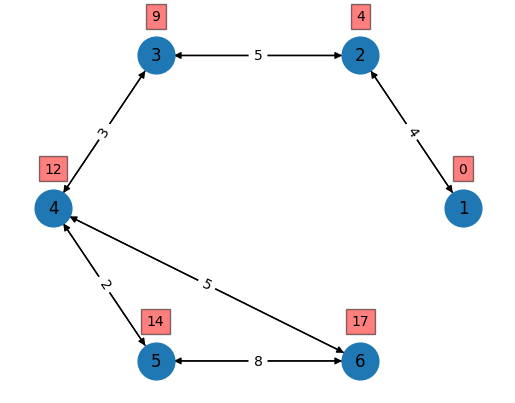

In [12]:
G1 = Grafo_D()
cont = 0 #En desuso
bandera1 = False
bandera2 = False
n = input("Ingrese el numero de nodos: ")
while True:
    try:
        strData = input("ingrese: vertice1,vertice2,distancia,AB,R,PP")
        strData = strData.strip()#eliminamos los espacios del frente y de atras
        if strData == "-1":
            print(strData)
            bandera1 =True
            break
        Data = strData.split()#generamos un array con los datos
        print(Data) #Debug
        assert len(Data) == 6 #Lanzamos excepcion si no se cumple la condicion
    except:
        print("Hubo un error vuelva a introducir los datos solicitados")
        continue
    #Verificamos la existencia de los vertices, y sino existe los creamos 
    if (G1.buscarVertice(Data[0]) == False):
        G1.agregarVertice(Vertice(Data[0]))
        print("Se creo el vertive ", Data[0])
    if (G1.buscarVertice(Data[1]) == False):
        G1.agregarVertice(Vertice(Data[1]))
        print("Se creo el vertive ", Data[1])
    #Creamos la arista en el grafo
    G1.agregarArista(Arista(G1.buscarVertice(Data[0]),G1.buscarVertice(Data[1]),int(Data[2]),int(Data[3]),int(Data[4]),float(Data[5])))
    cont += 1 #Incremento de condicion de salida del bucle mas interno
    #G1.mostrarVecinos() #Debug
metricas = []
while not bandera2:
    strEntrada = input("ingrese dos nodos: # #")
    strEntrada = strEntrada.strip()
    print(strEntrada)
    if strEntrada == "-1":
        print(strEntrada)
        bandera2 = True
        for i in range(0,len(metricas)):
            print("Caso #",i+1)
            print("Path: ",metricas[i][0])
            print("Distancia: ",metricas[i][1])
            print("Ancho de Banda: ",metricas[i][2])
            print("Retardo:",metricas[i][3])
            print("Probabilidad de PP: ",metricas[i][4])
            print("")
        break
    entrada = strEntrada.split()
    metrica = G1.buscarMenorDist(entrada[0],entrada[1]) 
    metricas.append(metrica)
G1.mostrarGrafo()